In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.stats as stats

In [6]:
transcriptome = pd.read_csv(
    "/Users/michael/Data/Luke_terrace_experiment/General_data/plate1_4_tpm_normalized.csv",
    index_col=0,
)
rows_to_drop_expression_data = [
    "A2450525897_n01_undetermined",
    "A2449446903_n01_undetermined",
    "B250508004_n01_undetermined",
    "B2449500127_n01_undetermined",
]
transcriptome = transcriptome.drop(index=rows_to_drop_expression_data)
transcriptome = transcriptome.sort_index()

metadata = pd.read_csv(
    "/Users/michael/Data/Luke_terrace_experiment/General_data/Plates_1_to_4_metadata_merged_luke.csv",
    index_col=0,
)
metadata = metadata.drop(
    columns=[
        "arb.sort",
        "sample-id",
        "Ambiguous Unstranded",
        "Ambiguous Forward",
        "Multimapping",
        "Unmapped Over Mapped",
    ]
)
metadata["Date and Time"] = metadata["date"] + " " + metadata["time"]
luke_time_data_format = "%-m/%-d/%y %-H:%-M"
metadata["Date and Time"] = pd.to_datetime(
    metadata["Date and Time"], format=luke_time_data_format
)

unusable_samples = [
    "A2450525897_n01_LICRNA01_A06",
    "A2450525897_n01_LICRNA01_A08",
    "A2450525897_n01_LICRNA01_C11",
    "A2450525897_n01_LICRNA01_D11",
    "A2450525897_n01_LICRNA01_D12",
    "A2449446903_n01_LICRNA02_F01",
    "B2449500127_n01_LICRNA04_A04",
    "B2449500127_n01_LICRNA04_A06",
    "B2449500127_n01_LICRNA04_A07",
]
borderline_unusable = [
    "A2450525897_n01_LICRNA01_F03",
    "A2450525897_n01_LICRNA01_G07",
    "A2449446903_n01_LICRNA02_A04",
    "A2449446903_n01_LICRNA02_H10",
    "B2449500127_n01_LICRNA04_H02",
    "B2449500127_n01_LICRNA04_H11",
]
all_unsable = borderline_unusable + unusable_samples

trimmed_transcriptome = transcriptome.drop(index=all_unsable)
trimmed_metadata = metadata.drop(index=all_unsable)
trimmed_metadata = trimmed_metadata.sort_index()
trimmed_transcriptome = trimmed_transcriptome.dropna(how="all", axis=0)
trimmed_transcriptome = trimmed_transcriptome.dropna(how="all", axis=1)

In [12]:
luke_bacterial_pca_results = pd.read_csv('/Users/michael/Data/Luke_terrace_experiment/Microbiome/AT_16S_ord_total.csv', index_col=0)
luke_bacterial_pca_results_cleaned = trimmed_metadata.merge(how = 'inner', right = luke_bacterial_pca_results[['PC1','PC2','PC3','PC4','PC5']], right_index = True, left_on  = 'sampID')
luke_bacterial_pca_results_cleaned


,plate.pos,sampID,sample.type,timepoint,date,time,extractplate,rnaprepplate,Unmapped,No Feature,...,Total Reads,Experiment Type,Sample Month,daysincestart,Date and Time,PC1,PC2,PC3,PC4,PC5
filename,,,,,,,,,,,,,,,,,,,,,
A2449446903_n01_LICRNA02_A01,A01,LIC157,plant,t14,1/23/24,8:00,LIC_02,LICRNA_02,758284.0,82176.0,...,1246970.0,Long Term,January,83,2024-01-23 08:00:00,-0.067055,0.032657,-0.054131,-0.038104,-0.121567
A2449446903_n01_LICRNA02_A02,A02,LIC169,plant,t15,1/27/24,8:00,LIC_02,LICRNA_02,3071877.0,353549.0,...,4985602.0,Long Term,January,87,2024-01-27 08:00:00,0.013184,-0.039252,-0.112619,0.074406,-0.017953
A2449446903_n01_LICRNA02_A03,A03,LIC193,plant,t17,2/2/24,8:00,LIC_03,LICRNA_02,1213638.0,158864.0,...,2465662.0,Long Term,February,93,2024-02-02 08:00:00,0.028509,0.035743,-0.069997,-0.023832,0.077216
A2449446903_n01_LICRNA02_A05,A05,LIC217,plant,t19,2/9/24,8:00,LIC_03,LICRNA_02,1303436.0,90929.0,...,1515395.0,Long Term,February,100,2024-02-09 08:00:00,0.005518,0.073235,0.011567,0.014267,0.037187
A2449446903_n01_LICRNA02_A06,A06,LIC229,plant,t20,2/16/24,8:00,LIC_03,LICRNA_02,1591231.0,141665.0,...,1924391.0,Long Term,February,107,2024-02-16 08:00:00,0.001707,-0.010284,0.018208,-0.001232,0.073537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_H08,H08,LIC428,plant,c1_t04,2/10/24,8:00,LICCIRC_01,LICRNA_03,2552177.0,438552.0,...,5245242.0,Circadian Experiment 1,February,101,2024-02-10 08:00:00,0.043131,0.023927,-0.043351,-0.023624,-0.023723
B250508004_n01_LICRNA03_H09,H09,LIC440,plant,c1_t05,2/10/24,12:00,LICCIRC_01,LICRNA_03,4228242.0,493699.0,...,7715482.0,Circadian Experiment 1,February,101,2024-02-10 12:00:00,0.036932,0.066385,0.021593,0.026330,-0.000193
B250508004_n01_LICRNA03_H10,H10,LIC452,plant,c1_t06,2/10/24,16:00,LICCIRC_01,LICRNA_03,365095.0,39090.0,...,643786.0,Circadian Experiment 1,February,101,2024-02-10 16:00:00,0.046516,-0.036567,-0.090188,0.101209,0.075161


In [13]:
microbiome_matched_transcriptome = trimmed_transcriptome.loc[luke_bacterial_pca_results_cleaned.index]
microbiome_matched_transcriptome

,AT1G01010,AT1G01020,AT1G03987,AT1G01030,AT1G01040,AT1G03993,AT1G01046,AT1G01050,AT1G03997,AT1G01060,...,ArthCt124,ArthCr088,ArthCt112,ArthCp088,ArthCp086,ArthCt118,ArthCp083,ArthCt111,ArthCp084,ArthCp085
filename,,,,,,,,,,,,,,,,,,,,,
A2449446903_n01_LICRNA02_A01,0.382839,11.929183,0.0,3.731527,3.602189,0.0,0.0,31.063543,0.0,3.966935,...,17.950907,44.209074,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,6.266498
A2449446903_n01_LICRNA02_A02,0.000000,5.826682,0.0,1.501594,3.439569,0.0,0.0,22.712417,0.0,18.186693,...,1.986484,9.688606,0.0,5.501032,0.0,0.0,0.519342,0.0,0.000000,3.467317
A2449446903_n01_LICRNA02_A03,1.021565,7.683520,0.0,0.301733,2.700528,0.0,0.0,42.431625,0.0,12.937632,...,7.983340,16.384320,0.0,7.983340,0.0,0.0,0.166972,0.0,0.000000,0.000000
A2449446903_n01_LICRNA02_A05,0.732717,3.149144,0.0,1.947758,3.742586,0.0,0.0,26.541337,0.0,23.861601,...,17.178143,17.005325,0.0,0.000000,0.0,0.0,0.628742,0.0,0.000000,0.000000
A2449446903_n01_LICRNA02_A06,1.614233,1.238895,0.0,6.130092,4.215597,0.0,0.0,19.379509,0.0,5.006570,...,16.219201,43.599301,0.0,0.000000,0.0,0.0,1.074213,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_H08,0.074367,4.474710,0.0,1.383813,2.059206,0.0,0.0,27.907884,0.0,11.118408,...,3.486989,4.209645,0.0,1.072920,0.0,0.0,0.948096,0.0,0.000000,0.760798
B250508004_n01_LICRNA03_H09,2.232353,6.249002,0.0,1.873955,3.869254,0.0,0.0,40.686812,0.0,7.391606,...,9.640892,4.655562,0.0,5.085306,0.0,0.0,0.360071,0.0,1.758217,4.807925
B250508004_n01_LICRNA03_H10,0.000000,0.000000,0.0,0.000000,2.953706,0.0,0.0,36.084398,0.0,0.000000,...,0.000000,4.975538,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000


In [15]:
pca = sklearn.decomposition.PCA(n_components = 5).fit_transform(microbiome_matched_transcriptome)
pca

array([[-19950.17037038,  -8516.76375967, -10717.70788157,
         -3799.37372475,   1587.63316364],
       [ 41388.67159186,   1039.15984822,  -1479.33444629,
         -1584.20664211,  -4919.97646359],
       [ 58614.59156412,   4125.11569122,  -4714.39155943,
         -2023.82134091,  -1621.45154301],
       ...,
       [ 26781.88810378, -33676.23956743,   3334.4377621 ,
         -5948.92345914,  -6472.37369229],
       [-63292.71499283, -15610.25336706,   4807.53809651,
        -13059.99034059, -13689.66771268],
       [  6539.38474304,  32793.92568437,   5267.05808449,
           940.96903641,  -5259.61996529]], shape=(368, 5))

In [21]:
pca_df = pd.DataFrame(data = pca, index = luke_bacterial_pca_results_cleaned.index, columns = ['PC1','PC2','PC3','PC4','PC5'])

In [23]:
pca_df.to_csv('/Users/michael/Data/Luke_terrace_experiment/Output_for_Luke/transcriptome_pca_1_to_5.csv', index = True)

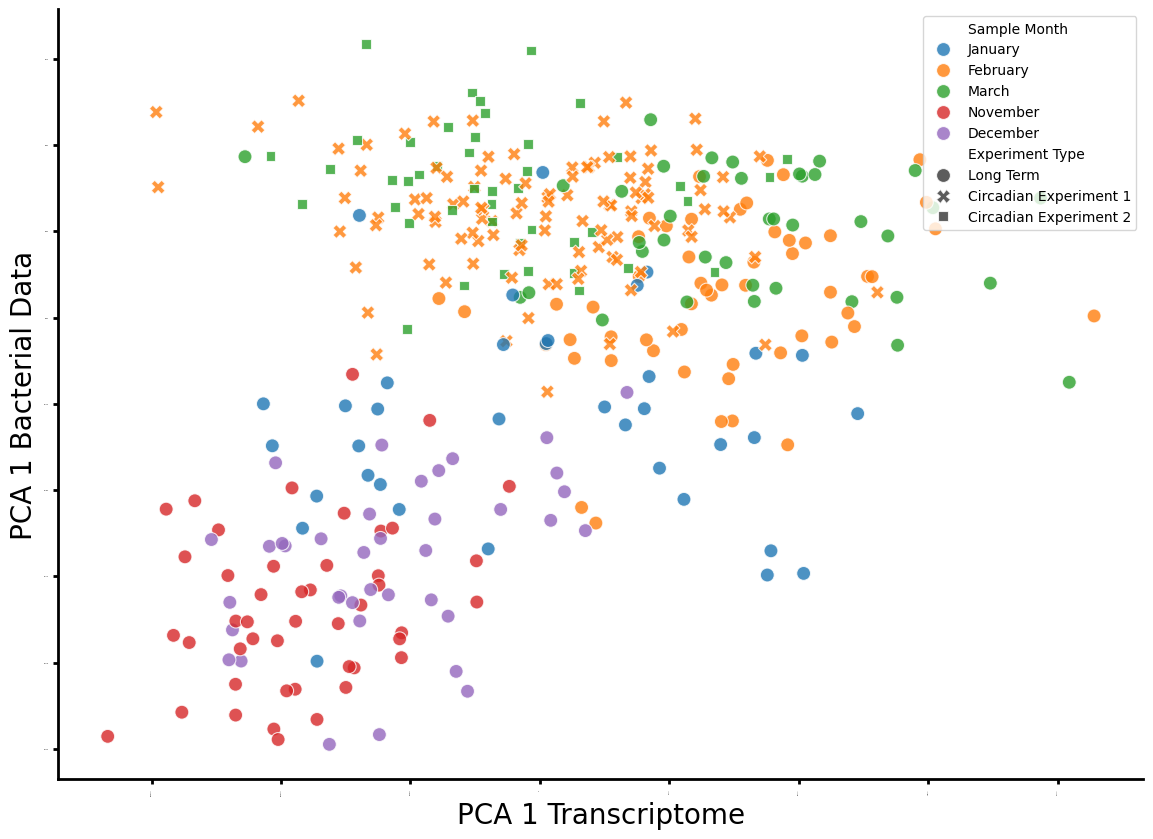

In [20]:
fig, ax = plt.subplots(figsize=(14, 10))
fig.patch.set_facecolor("white")
ax = sns.scatterplot(
    x=pca[:, 0],
    y=luke_bacterial_pca_results_cleaned['PC1'],
    hue=luke_bacterial_pca_results_cleaned["Sample Month"],
    style=luke_bacterial_pca_results_cleaned["Experiment Type"],
    s=100,
    alpha=0.8,
)
plt.xlabel("PCA 1 Transcriptome", fontsize=20)
plt.ylabel("PCA 1 Bacterial Data", fontsize=20)
sns.despine()
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(fontsize=0, rotation=90)
plt.yticks(fontsize=0)
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
# for line in range(0,full_meta_data.shape[0]):
#      ax.text(pca[:,0][line]+0.01, pca[:,1][line], 
#      full_meta_data['plate.pos'][line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')

# plt.ylim(0,10)
plt.savefig('/Users/michael/Data/Luke_terrace_experiment/Output_for_Luke/Figs/PCA_1_transcriptomevsmicrobiome_spearman_corr_zero_point_3_5.pdf')

In [17]:
trimmed_transcriptome

,AT1G01010,AT1G01020,AT1G03987,AT1G01030,AT1G01040,AT1G03993,AT1G01046,AT1G01050,AT1G03997,AT1G01060,...,ArthCt124,ArthCr088,ArthCt112,ArthCp088,ArthCp086,ArthCt118,ArthCp083,ArthCt111,ArthCp084,ArthCp085
A2449446903_n01_LICRNA02_A01,0.382839,11.929183,0.0,3.731527,3.602189,0.0,0.0,31.063543,0.0,3.966935,...,17.950907,44.209074,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,6.266498
A2449446903_n01_LICRNA02_A02,0.000000,5.826682,0.0,1.501594,3.439569,0.0,0.0,22.712417,0.0,18.186693,...,1.986484,9.688606,0.0,5.501032,0.0,0.0,0.519342,0.0,0.000000,3.467317
A2449446903_n01_LICRNA02_A03,1.021565,7.683520,0.0,0.301733,2.700528,0.0,0.0,42.431625,0.0,12.937632,...,7.983340,16.384320,0.0,7.983340,0.0,0.0,0.166972,0.0,0.000000,0.000000
A2449446903_n01_LICRNA02_A05,0.732717,3.149144,0.0,1.947758,3.742586,0.0,0.0,26.541337,0.0,23.861601,...,17.178143,17.005325,0.0,0.000000,0.0,0.0,0.628742,0.0,0.000000,0.000000
A2449446903_n01_LICRNA02_A06,1.614233,1.238895,0.0,6.130092,4.215597,0.0,0.0,19.379509,0.0,5.006570,...,16.219201,43.599301,0.0,0.000000,0.0,0.0,1.074213,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_H08,0.074367,4.474710,0.0,1.383813,2.059206,0.0,0.0,27.907884,0.0,11.118408,...,3.486989,4.209645,0.0,1.072920,0.0,0.0,0.948096,0.0,0.000000,0.760798
B250508004_n01_LICRNA03_H09,2.232353,6.249002,0.0,1.873955,3.869254,0.0,0.0,40.686812,0.0,7.391606,...,9.640892,4.655562,0.0,5.085306,0.0,0.0,0.360071,0.0,1.758217,4.807925
B250508004_n01_LICRNA03_H10,0.000000,0.000000,0.0,0.000000,2.953706,0.0,0.0,36.084398,0.0,0.000000,...,0.000000,4.975538,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
B250508004_n01_LICRNA03_H11,0.678594,7.655887,0.0,0.901942,4.195848,0.0,0.0,54.077818,0.0,0.334834,...,0.000000,2.304762,0.0,0.000000,0.0,0.0,0.166371,0.0,0.000000,0.694222


In [ ]:
pca[:,0]

In [ ]:
pca[:,0].tolist()

In [19]:
correlation,pval = stats.spearmanr(a = pca[:,0].tolist(), b = luke_bacterial_pca_results_cleaned['PC1'].to_list())
correlation

np.float64(0.34284415731396206)

In [ ]:
len(pca[:,0].tolist())

In [ ]:
luke_bacterial_pca_results_cleaned.loc[luke_bacterial_pca_results_cleaned['PC1'].isna()]

In [ ]:
np.any(np.isnan(luke_bacterial_pca_results_cleaned['PC1']))

In [ ]:
pval